In [34]:
from google.colab import drive
from pdf2image import convert_from_path
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [35]:
# Mounting to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
def extract_icons_from_pdf(pdf_path):
    """ This extracts icons from a PDF file and returns a list of grayscale images."""
    try:
        pages = convert_from_path(pdf_path)
        icons = []
        for page in pages:
            gray_image = page.convert('L')
            gray_image_np = np.array(gray_image)
            _, thresh = cv2.threshold(gray_image_np, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                x, y, w, h = cv2.boundingRect(cnt)
                icon_image = gray_image_np[y:y+h, x:x+w]
                icon_image = cv2.resize(icon_image, (64, 64))
                icon_image = cv2.normalize(icon_image, None, 0, 255, cv2.NORM_MINMAX)
                icons.append(icon_image)

        return icons

    except Exception as e:
        print(f"Error processing PDF: {e}")
        return []

In [37]:
def preprocess_special_icon(icon, size=(64, 64)):
    """ This will preprocess the icon with resizing and thresholding."""
    resized_icon = cv2.resize(icon, size, interpolation=cv2.INTER_AREA)
    equalized_icon = cv2.equalizeHist(resized_icon)
    thresh = cv2.adaptiveThreshold(equalized_icon, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
    edges = cv2.Canny(thresh, 100, 200)
    kernel = np.ones((3, 3), np.uint8)
    morphology = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    return thresh, edges, morphology

In [38]:
def visualize_icon_processing(icon, icon_id, count):
    """This will visualize the processing steps for a given icon."""

    thresh, edges, morphology = preprocess_special_icon(icon)
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(icon, cmap='gray')
    plt.title(f"Original Icon {icon_id} (Count: {count})")

    plt.subplot(2, 3, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title(f"Thresholded Icon {icon_id}")

    plt.subplot(2, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Edges Icon {icon_id}")

    plt.subplot(2, 3, 4)
    plt.imshow(morphology, cmap='gray')
    plt.title(f"Morphology Icon {icon_id}")

    plt.tight_layout()
    plt.show()

In [39]:
def count_matching_icons(schedule_icons, room_plan_icons):
    """Counts the occurrences of each schedule icon in the room plan."""
    icon_counts = {}
    for i, schedule_icon in enumerate(schedule_icons):
        count = 0
        for room_icon in room_plan_icons:
            # Compare the icons using template matching
            result = cv2.matchTemplate(room_icon, schedule_icon, cv2.TM_CCOEFF_NORMED)
            _, max_val, _, _ = cv2.minMaxLoc(result)

            # Threshold for considering a match
            if max_val > 0.8:  # Adjust threshold as needed for accuracy
                count += 1

        icon_counts[i] = count
    return icon_counts

Icon 0: 2452 occurrence(s) in the room plan.
Icon 1: 23 occurrence(s) in the room plan.
Icon 2: 2452 occurrence(s) in the room plan.
Icon 3: 23 occurrence(s) in the room plan.
Icon 4: 23 occurrence(s) in the room plan.
Icon 5: 2452 occurrence(s) in the room plan.
Icon 6: 2452 occurrence(s) in the room plan.
Icon 7: 0 occurrence(s) in the room plan.
Icon 8: 0 occurrence(s) in the room plan.
Icon 9: 7 occurrence(s) in the room plan.


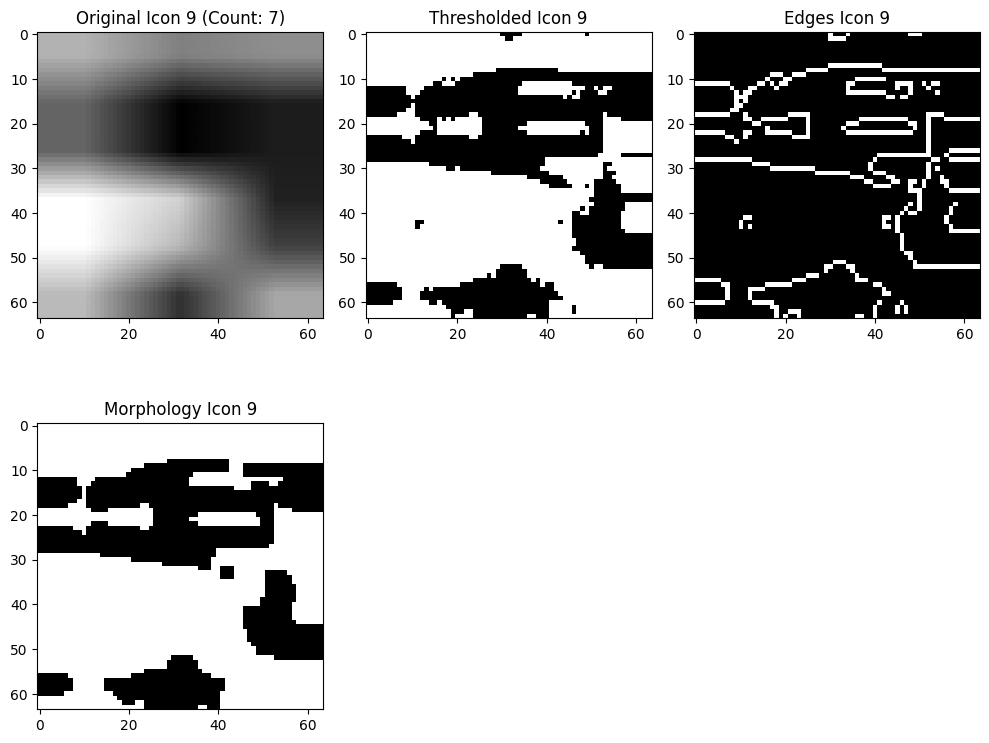

Icon 10: 33 occurrence(s) in the room plan.
Icon 11: 0 occurrence(s) in the room plan.
Icon 12: 6 occurrence(s) in the room plan.
Icon 13: 20 occurrence(s) in the room plan.
Icon 14: 46 occurrence(s) in the room plan.


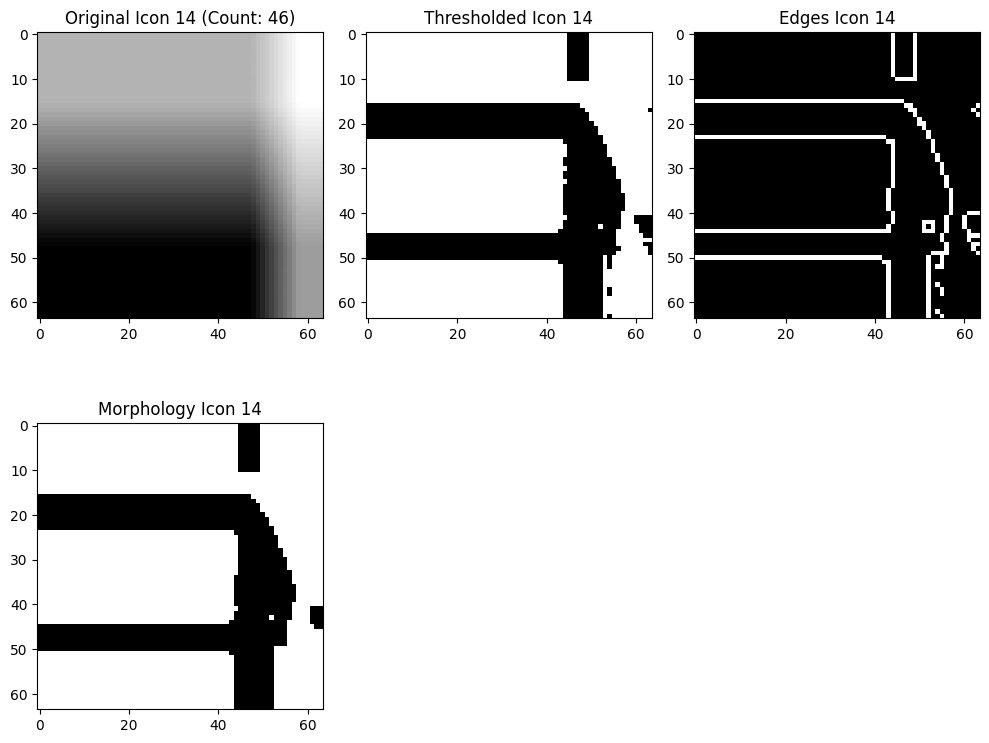

Icon 15: 20 occurrence(s) in the room plan.
Icon 16: 39 occurrence(s) in the room plan.
Icon 17: 39 occurrence(s) in the room plan.
Icon 18: 0 occurrence(s) in the room plan.
Icon 19: 39 occurrence(s) in the room plan.
Icon 20: 46 occurrence(s) in the room plan.
Icon 21: 46 occurrence(s) in the room plan.
Icon 22: 33 occurrence(s) in the room plan.
Icon 23: 33 occurrence(s) in the room plan.


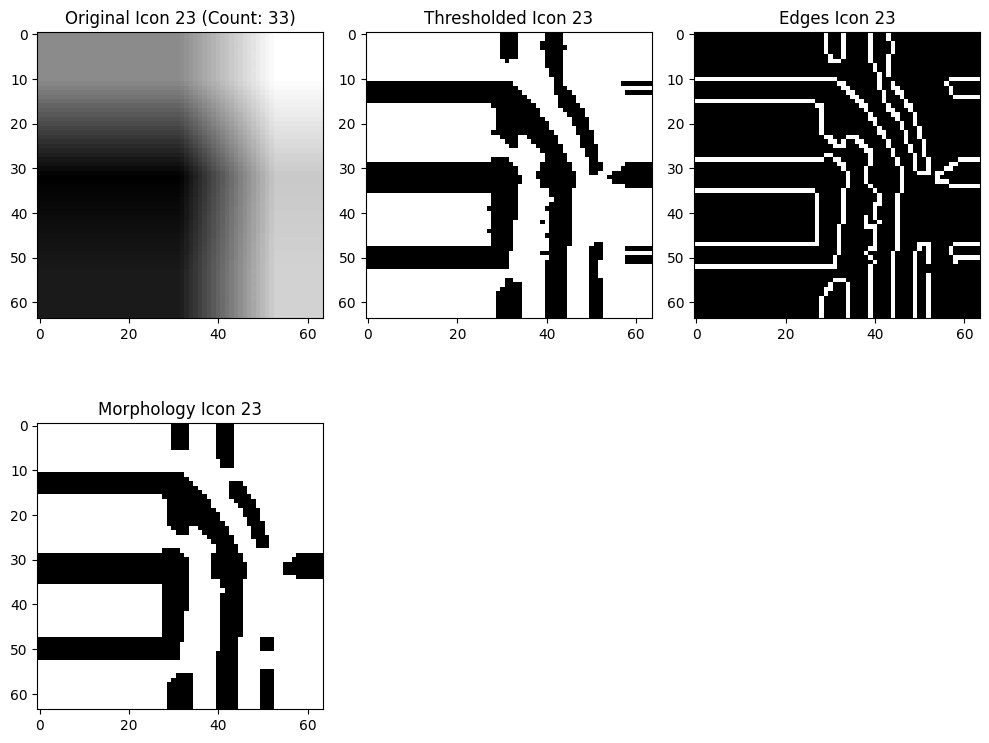

Icon 24: 34 occurrence(s) in the room plan.
Icon 25: 8 occurrence(s) in the room plan.
Icon 26: 3 occurrence(s) in the room plan.
Icon 27: 2 occurrence(s) in the room plan.
Icon 28: 5 occurrence(s) in the room plan.
Icon 29: 27 occurrence(s) in the room plan.
Icon 30: 5 occurrence(s) in the room plan.
Icon 31: 8 occurrence(s) in the room plan.
Icon 32: 2 occurrence(s) in the room plan.
Icon 33: 2 occurrence(s) in the room plan.
Icon 34: 5 occurrence(s) in the room plan.
Icon 35: 47 occurrence(s) in the room plan.
Icon 36: 3 occurrence(s) in the room plan.
Icon 37: 5 occurrence(s) in the room plan.
Icon 38: 2 occurrence(s) in the room plan.
Icon 39: 32 occurrence(s) in the room plan.
Icon 40: 3 occurrence(s) in the room plan.
Icon 41: 8 occurrence(s) in the room plan.
Icon 42: 2 occurrence(s) in the room plan.
Icon 43: 8 occurrence(s) in the room plan.
Icon 44: 14 occurrence(s) in the room plan.
Icon 45: 34 occurrence(s) in the room plan.
Icon 46: 23 occurrence(s) in the room plan.
Icon

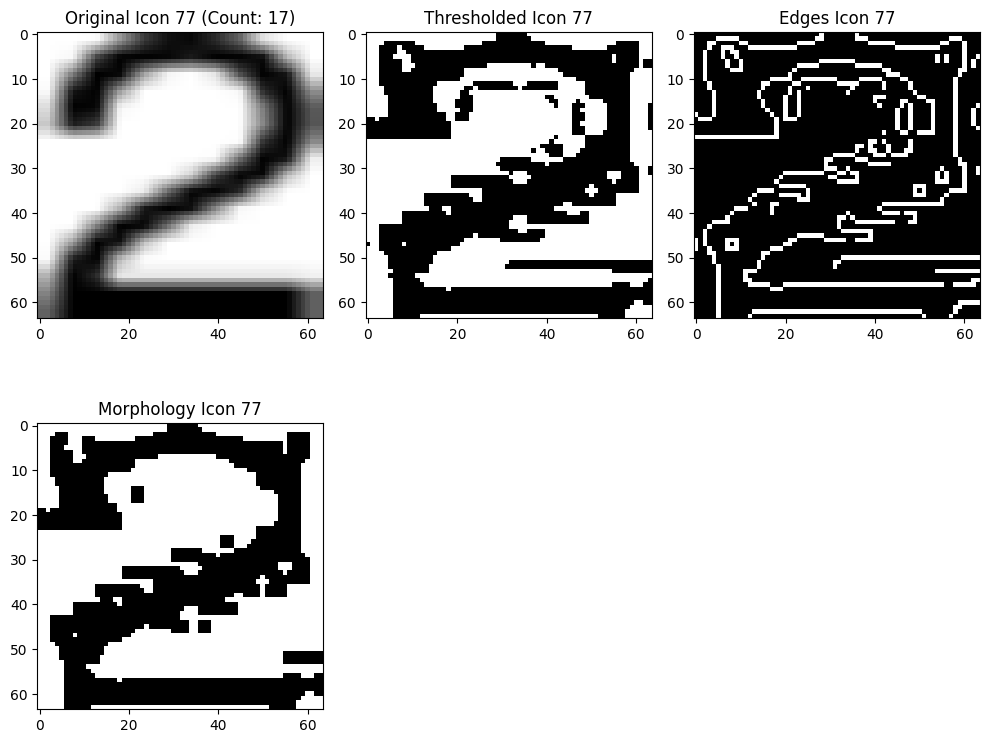

Icon 78: 15 occurrence(s) in the room plan.
Icon 79: 115 occurrence(s) in the room plan.
Icon 80: 137 occurrence(s) in the room plan.
Icon 81: 0 occurrence(s) in the room plan.
Icon 82: 0 occurrence(s) in the room plan.
Icon 83: 1 occurrence(s) in the room plan.
Icon 84: 17 occurrence(s) in the room plan.
Icon 85: 10 occurrence(s) in the room plan.
Icon 86: 44 occurrence(s) in the room plan.


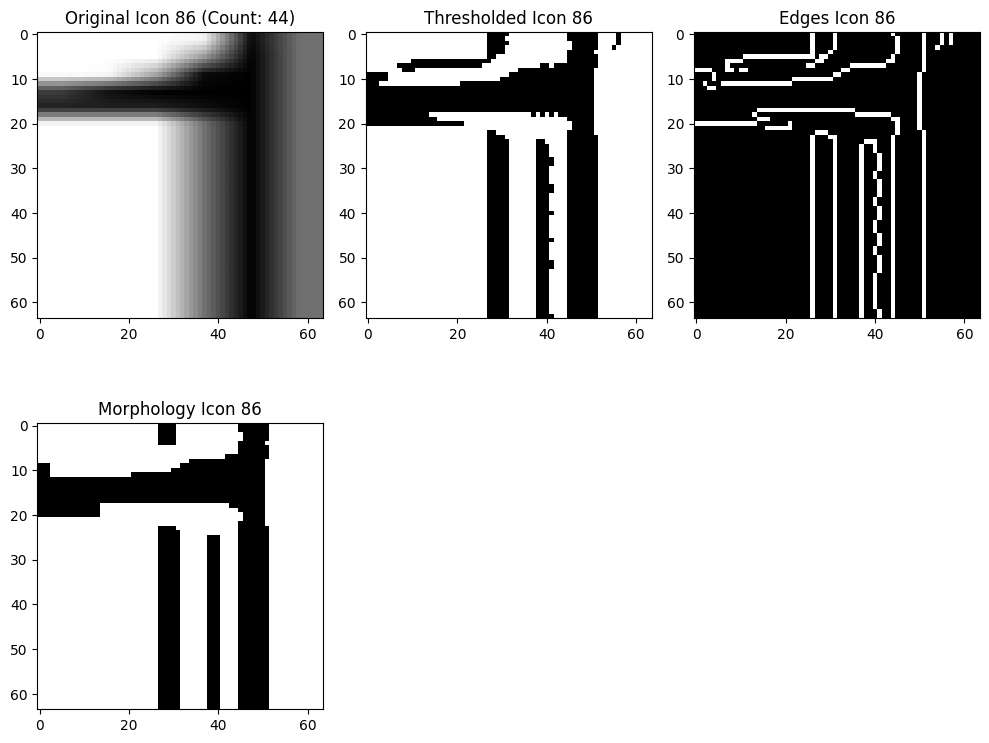

Icon 87: 115 occurrence(s) in the room plan.
Icon 88: 10 occurrence(s) in the room plan.
Icon 89: 37 occurrence(s) in the room plan.
Icon 90: 8 occurrence(s) in the room plan.


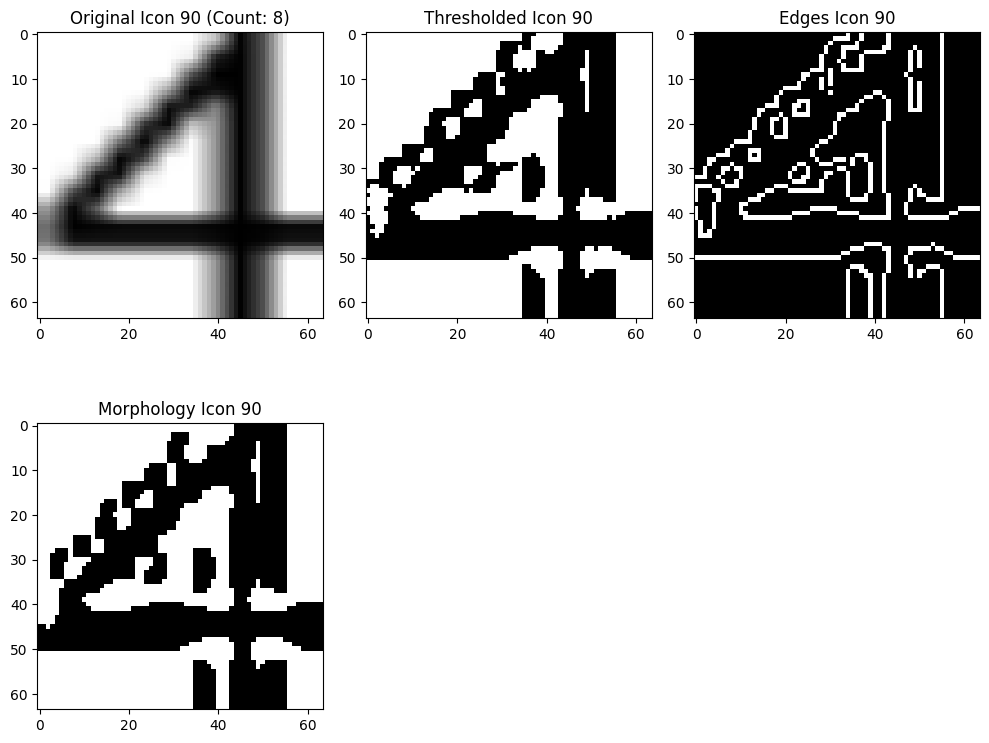

Icon 91: 17 occurrence(s) in the room plan.
Icon 92: 37 occurrence(s) in the room plan.
Icon 93: 16 occurrence(s) in the room plan.
Icon 94: 15 occurrence(s) in the room plan.
Icon 95: 110 occurrence(s) in the room plan.
Icon 96: 9 occurrence(s) in the room plan.
Icon 97: 9 occurrence(s) in the room plan.
Icon 98: 2 occurrence(s) in the room plan.
Icon 99: 42 occurrence(s) in the room plan.
Icon 100: 20 occurrence(s) in the room plan.
Icon 101: 104 occurrence(s) in the room plan.
Icon 102: 0 occurrence(s) in the room plan.
Icon 103: 104 occurrence(s) in the room plan.
Icon 104: 1 occurrence(s) in the room plan.
Icon 105: 15 occurrence(s) in the room plan.
Icon 106: 0 occurrence(s) in the room plan.
Icon 107: 87 occurrence(s) in the room plan.
Icon 108: 42 occurrence(s) in the room plan.
Icon 109: 18 occurrence(s) in the room plan.
Icon 110: 29 occurrence(s) in the room plan.
Icon 111: 12 occurrence(s) in the room plan.
Icon 112: 65 occurrence(s) in the room plan.
Icon 113: 18 occurrenc

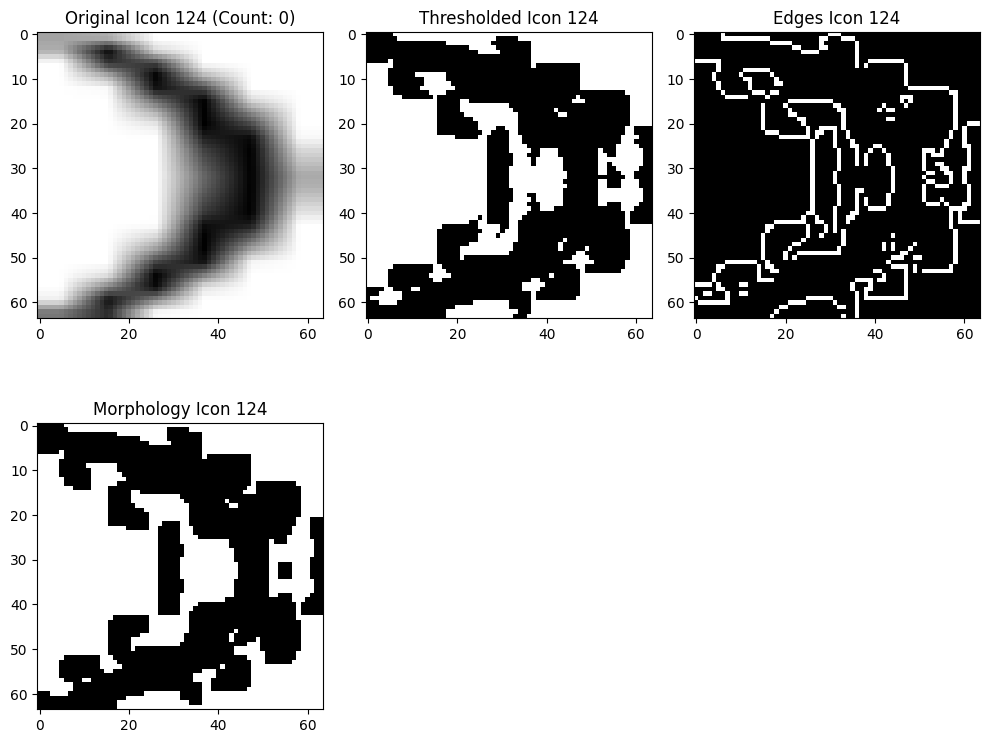

Icon 125: 42 occurrence(s) in the room plan.
Icon 126: 82 occurrence(s) in the room plan.
Icon 127: 0 occurrence(s) in the room plan.
Icon 128: 1 occurrence(s) in the room plan.
Icon 129: 0 occurrence(s) in the room plan.
Icon 130: 1 occurrence(s) in the room plan.
Icon 131: 0 occurrence(s) in the room plan.
Icon 132: 0 occurrence(s) in the room plan.
Icon 133: 106 occurrence(s) in the room plan.
Icon 134: 15 occurrence(s) in the room plan.
Icon 135: 24 occurrence(s) in the room plan.
Icon 136: 18 occurrence(s) in the room plan.
Icon 137: 2 occurrence(s) in the room plan.
Icon 138: 25 occurrence(s) in the room plan.
Icon 139: 101 occurrence(s) in the room plan.


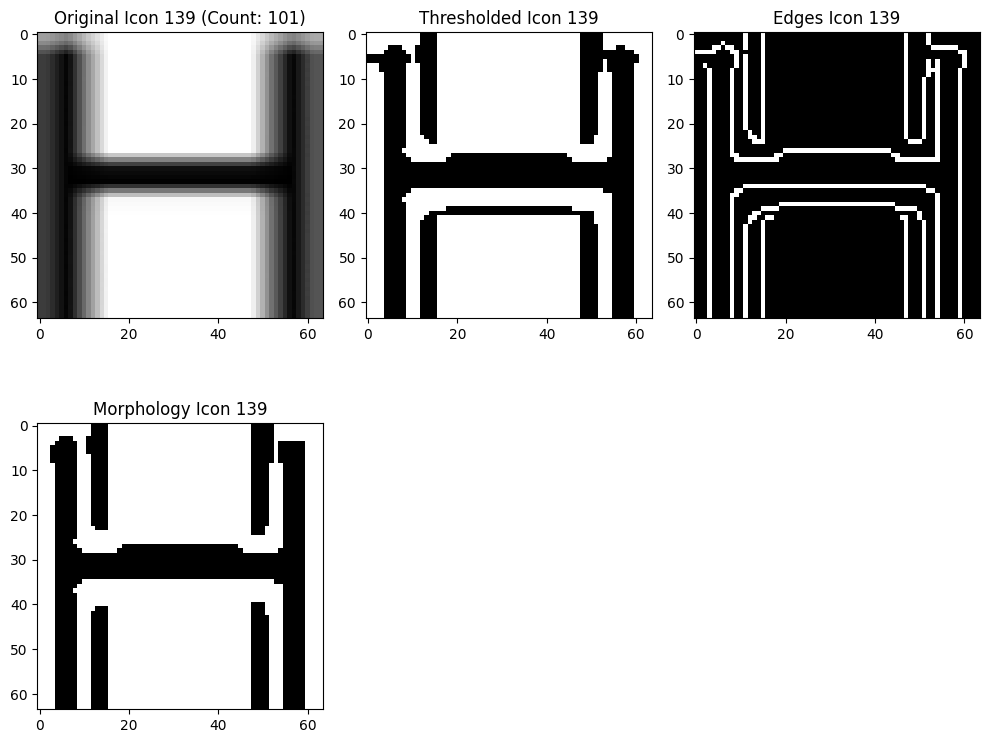

Icon 140: 0 occurrence(s) in the room plan.


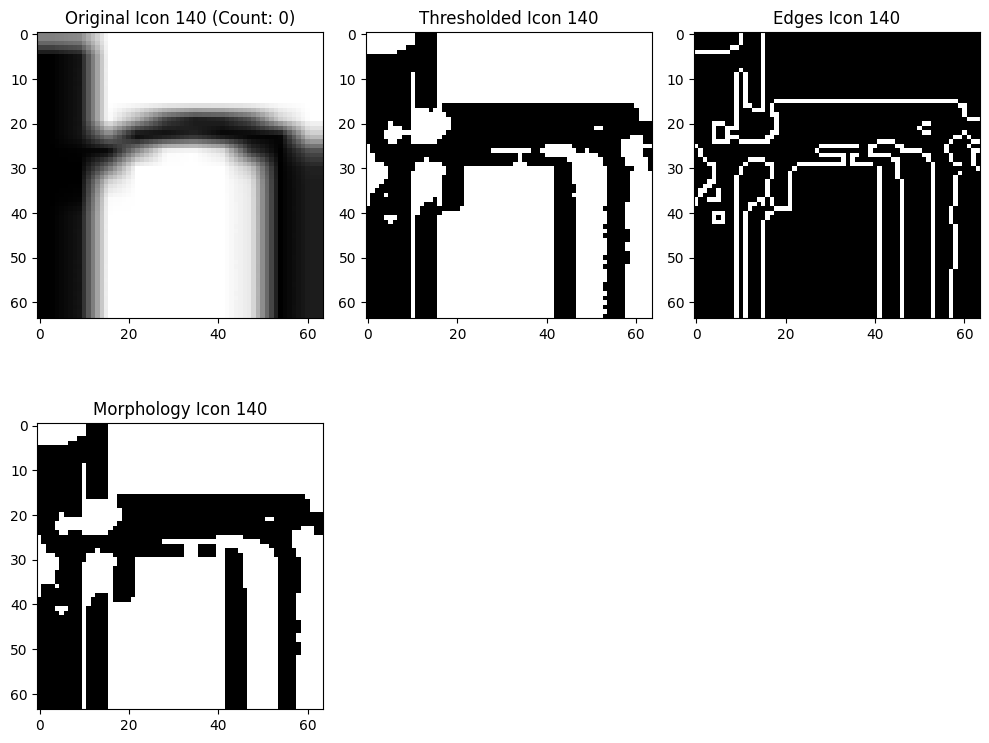

Icon 141: 106 occurrence(s) in the room plan.
Icon 142: 48 occurrence(s) in the room plan.
Icon 143: 150 occurrence(s) in the room plan.
Icon 144: 47 occurrence(s) in the room plan.
Icon 145: 187 occurrence(s) in the room plan.
Icon 146: 41 occurrence(s) in the room plan.
Icon 147: 67 occurrence(s) in the room plan.
Icon 148: 154 occurrence(s) in the room plan.
Icon 149: 57 occurrence(s) in the room plan.
Icon 150: 28 occurrence(s) in the room plan.
Icon 151: 104 occurrence(s) in the room plan.
Icon 152: 3 occurrence(s) in the room plan.
Icon 153: 41 occurrence(s) in the room plan.
Icon 154: 17 occurrence(s) in the room plan.
Icon 155: 104 occurrence(s) in the room plan.
Icon 156: 60 occurrence(s) in the room plan.
Icon 157: 26 occurrence(s) in the room plan.
Icon 158: 41 occurrence(s) in the room plan.
Icon 159: 45 occurrence(s) in the room plan.
Icon 160: 45 occurrence(s) in the room plan.
Icon 161: 76 occurrence(s) in the room plan.
Icon 162: 95 occurrence(s) in the room plan.
Icon 

In [40]:
schedule_pdf_path = '/content/drive/My Drive/DataSet_Intern/DataSet/Schedule.pdf'
room_plan_pdf_path = '/content/drive/My Drive/DataSet_Intern/DataSet/RoomPlan.pdf'

schedule_icons = extract_icons_from_pdf(schedule_pdf_path)
room_plan_icons = extract_icons_from_pdf(room_plan_pdf_path)
icon_counts = count_matching_icons(schedule_icons, room_plan_icons)

for icon_id, count in icon_counts.items():
    print(f"Icon {icon_id}: {count} occurrence(s) in the room plan.")
    if icon_id in [9, 14, 23, 77, 86, 90, 124, 139, 140]:
        visualize_icon_processing(schedule_icons[icon_id], icon_id, count)
